## Problem Statement


Implement an image color detector which identifies all the colors in an image or video.

Reference for the task taken from https://towardsdatascience.com/color-identification-in-images-machine-learning-application-b26e770c4c71

## Import all required libraries

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

## Applying all the Various OpenCV functions from the reference resources

The Image contains inputs in following format <class 'numpy.ndarray'>
While the Shape is in dimension : (259, 194, 3)


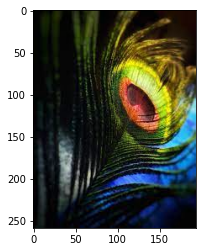

In [ ]:
image = cv2.imread('/content/iimg1.jpg')
print("The Image contains inputs in following format {}".format(type(image)))
print("While the Shape is in dimension : {}".format(image.shape))
plt.imshow(image)

## Conversion from BGR to RGB Image 

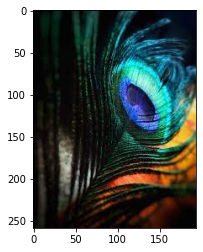

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Conversion from BGR to Grayscale Image 

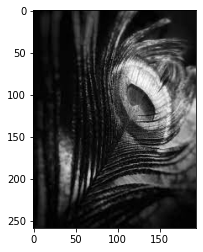

In [ ]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

## Conversion from RBG to HEX Conversion Function

In [ ]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

## Function For Fetching Image in RGB Colorspace

In [ ]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

## Fetching Colors From Images

In [ ]:
def get_colors(image, number_of_colors, show_chart):
    
 modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
 modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
 clf = KMeans(n_clusters = number_of_colors)
 labels = clf.fit_predict(modified_image)
    
 counts = Counter(labels)

 center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
 ordered_colors = [center_colors[i] for i in counts.keys()]
 hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
 rgb_colors = [ordered_colors[i] for i in counts.keys()]

 if (show_chart):
    plt.figure(figsize = (8, 6))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)

 return rgb_colors

## Image Dict For Further Color Searching

In [ ]:
IMAGE_DIRECTORY = '/content/image'
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'YELLOW': [255, 255, 0],
    'RED' : [255, 0, 0],
    'PURPLE' : [128, 0, 128]
}
images = []

for file in os.listdir(IMAGE_DIRECTORY):
    if not file.startswith('.'):
        images.append(get_image(os.path.join(IMAGE_DIRECTORY, file)))

## Plotting all the Images present in the image folder

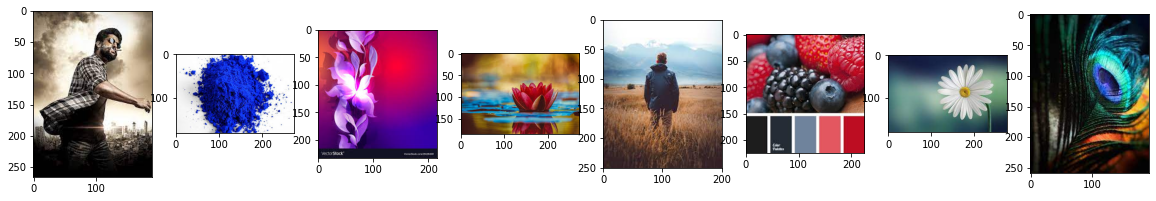

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

## Function For Matching Image By Different Colors

In [ ]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

## Function For Showing Selected Images

In [ ]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(1, 5, index)
            plt.imshow(images[i])
            index += 1

## Search Images Which Contain Green Color

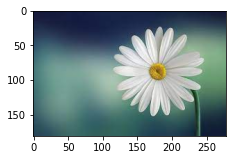

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['GREEN'], 60, 5)

## Search Images Which Contain BLUE Color

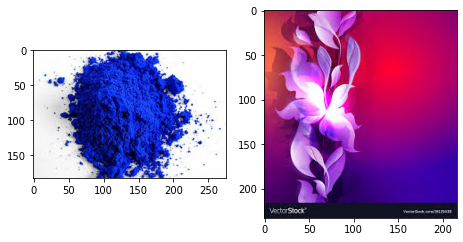

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['BLUE'], 60, 5)

## Search Images Which Contain Red Color

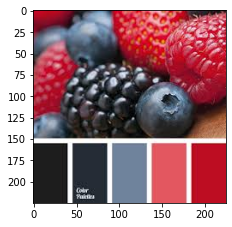

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['RED'], 60, 5)

## Search Images Which Contain Yellow Color

In [ ]:
plt.figure(figsize = (20, 10))
show_selected_images(images, COLORS['YELLOW'], 60, 5)

<Figure size 1440x720 with 0 Axes>

## Get All Colors From iimg4 Image

[array([175.28390762, 156.79261364, 133.1256415 ]),
 array([59.96286286, 50.54744745, 44.34654655]),
 array([251.63793029, 249.86196227, 242.81709571]),
 array([243.49492416, 236.93168518, 221.74758151]),
 array([80.29329731, 69.0628432 , 59.92199076]),
 array([140.8567777 , 124.31917876, 103.63299802]),
 array([206.70482989, 188.55984055, 165.27366274]),
 array([39.85425268, 32.72072667, 28.29488026]),
 array([219.68641084, 204.64505643, 183.31042889]),
 array([233.04153094, 220.83661534, 201.37022505]),
 array([190.87476335, 172.24914805, 148.53199546]),
 array([100.51922456,  87.17915994,  74.53279483]),
 array([20.34641977, 15.92719293, 13.9882162 ]),
 array([3.48413023, 2.35444762, 2.20748763]),
 array([158.53142486, 140.99424215, 118.39080367]),
 array([121.35466467, 106.53178951,  89.68359894])]

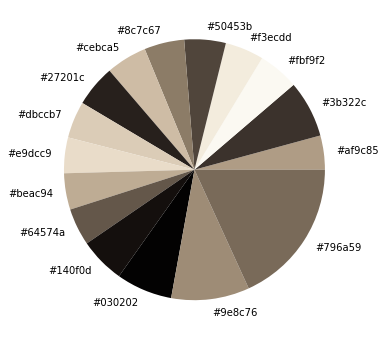

In [ ]:
get_colors(get_image('/content/iimg4.jpg'),16 , True)


## Applying Some OpenCV functions

The Image contains inputs in following format <class 'numpy.ndarray'>
While the Shape is in dimension : (185, 272, 3)


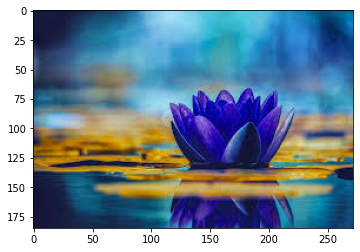

In [ ]:
image_new = cv2.imread('/content/iimg5.jpg')
print("The Image contains inputs in following format {}".format(type(image_new)))
print("While the Shape is in dimension : {}".format(image_new.shape))
plt.imshow(image_new)

## BGR to RGB Image Conversion

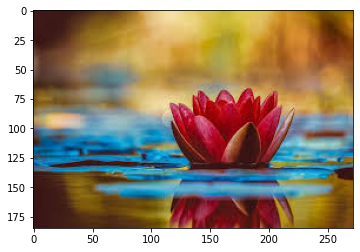

In [ ]:
image_2 = cv2.cvtColor(image_new, cv2.COLOR_BGR2RGB)
plt.imshow(image_2)

## Get All Colors From Stone Image

[array([ 99.44090258, 124.91466691, 139.13843123]),
 array([192.77692   , 151.85594115,  55.47478242]),
 array([146.07263752,  11.2174189 ,  23.35098731]),
 array([131.77612017,  88.02021709,  18.37548228]),
 array([ 15.70916248, 138.95028792, 189.83191195]),
 array([228.75950285, 200.08731227, 139.68948731]),
 array([ 27.32576442,  88.29067217, 129.87833828]),
 array([213.43556536, 177.8593995 ,  89.6836634 ]),
 array([100.50577152,  57.3418914 ,  27.00595269]),
 array([183.13262892,  52.45355622,  74.5062293 ]),
 array([134.75738113, 173.06892255, 183.52971626]),
 array([164.83391164, 143.50188912, 113.3640219 ]),
 array([67.89938978, 26.98229622, 22.58124906]),
 array([168.89242164, 119.6203595 ,  44.44982386]),
 array([121.40885878,  98.19729026,  78.59166232]),
 array([ 84.08688443, 162.1162328 , 192.01973139])]

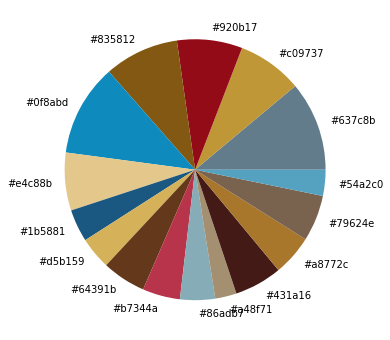

In [ ]:
get_colors(get_image('/content/iimg5.jpg'),16 , True)